# Assignment 3

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

In [1]:
NAME = "Alfredo Renteria"

# 1) Binary Classification
## i) Logistic Regression
In this task, we will run logistic regression using scikit learn. But first the dataset needs to be created. Call this data set the Gaussian Quantile Dataset.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
np.random.seed(111)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Construct dataset
X, y = make_gaussian_quantiles(cov=4.,
                                 n_samples=500, n_features=1,
                                 n_classes=2, random_state=1)
# Making X1 values, reshape y1, and creating random noise for x1 values
X = X-3.0  
noise = np.random.normal(loc=0.0, scale=0.4, size=len(X)).reshape(-1,1)
y = y.reshape(-1,1)
X = np.sum([X,noise],axis=0)

In [4]:
# The dataset
print(np.concatenate((X,y), axis=1, out=None))

[[-2.42338811e+00  0.00000000e+00]
 [ 1.53512714e+00  1.00000000e+00]
 [-2.97599422e+00  0.00000000e+00]
 [ 4.78916909e-01  1.00000000e+00]
 [-1.60960529e+00  1.00000000e+00]
 [-3.55691511e+00  0.00000000e+00]
 [-3.86154330e+00  0.00000000e+00]
 [-3.07094921e+00  0.00000000e+00]
 [ 2.76750500e+00  1.00000000e+00]
 [-2.41581646e+00  0.00000000e+00]
 [-4.62707507e+00  1.00000000e+00]
 [-4.74476399e+00  1.00000000e+00]
 [-3.00505940e+00  0.00000000e+00]
 [ 5.43380441e-01  1.00000000e+00]
 [-5.55712418e+00  1.00000000e+00]
 [-1.41449115e+00  1.00000000e+00]
 [-2.27826391e+00  0.00000000e+00]
 [-1.94740223e+00  0.00000000e+00]
 [-2.46007512e+00  0.00000000e+00]
 [-3.76786255e+00  0.00000000e+00]
 [-7.59123156e-01  1.00000000e+00]
 [-3.92296941e+00  0.00000000e+00]
 [-1.40830029e+00  1.00000000e+00]
 [-3.51714486e+00  0.00000000e+00]
 [-6.91583977e-01  1.00000000e+00]
 [-3.25406548e+00  0.00000000e+00]
 [-4.70192512e+00  0.00000000e+00]
 [-2.88430556e+00  0.00000000e+00]
 [-3.82868876e+00  0

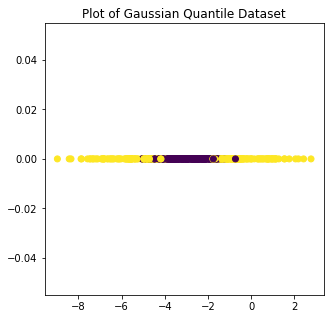

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], np.zeros(len(X)), c=y)

# plt.plot(x_test, clf.coef_ * x_test + clf.intercept_, linewidth=3)
plt.title('Plot of Gaussian Quantile Dataset')
plt.show()

Above is a plot of the dataset we created. Yellow dots are class 1 and purple dots are class 0.
### i.a.) Comment on how do you think logistic regression will perform when trying to classify this dataset.

Without transforming the dataset, logistic regression will perform very poorly.
The dataset in its current representation is not linearly seperable, so this will cause logistic regression to struggle with classifying it.  

### i.b.) Implement Logistic Regression
Implement logistic regression using scikit learn on the dataset we created and train the model. \
You may refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for more information on scikit learn logistic regression.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
# Use the sklearn train test split function to generate the training and test sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.18, random_state=1)
# Call logistic regression form sklearn
clf = LogisticRegression(penalty='l2', C=1.0, max_iter=100, solver='lbfgs').fit(x_train, y_train)
print('Training Score: ', clf.score(x_train, y_train))
print('Testing Score: ', clf.score(x_test, y_test))

Training Score:  0.7024390243902439
Testing Score:  0.7555555555555555


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


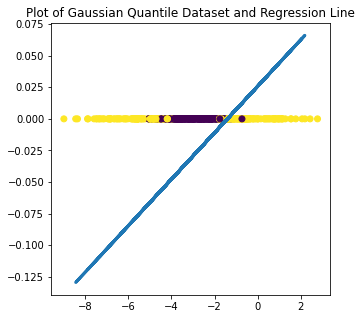

In [8]:
# Plot results
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], np.zeros(len(X)), c=y)

plt.plot(x_test, clf.coef_ * x_test + clf.intercept_, linewidth=3)
plt.title('Plot of Gaussian Quantile Dataset and Regression Line')
plt.show()

### i.c) How did we do?

Please comment on the performance of the model you trained on training and test sets. Did you try adjusting the parameters? If so, did they help?

The model I settled for, resulted in a Training score of 70, and a Test score of ~76. I experimented with many parameters, like test_size, penalty, C, max_iter, and solver. For the most part, I was getting scores below or at .50. I noticed a smaller test_size resulted in higher scores, but I settled for a test_size parameter that netted an 'impressive' score, while not straying too far from the default setting of 0.25. The parameters observed for LogisticRegression() are actually default params. The bad performance is observed, as the blue line doesn't clearly seperate the purple dots from the yellow dots.

## ii) Polynomial Transformation + Sign Classification
Let's try some other models and see if they perform better. Recall from lecture the Binary "Sign" Classifier:
$$\begin{align}
f(x)= sign({\bf{\theta}}\cdot\phi(x))=\begin{cases} 
          1 & 0\leq {\bf{\theta}} \cdot\phi(x)  \\
          0 & {\bf{\theta}} \cdot\phi(x) < 0
            \end{cases}
\end{align}
$$
We will now use Binary Sign Classifier, along with polynomial and horizontal translation in order to learn out dataset. In the next couple of sections we will illustrate how to use polynomial and horizontal translation in order use the Sign Binary Classifier. \\
** Note that we will classify an example as 1 if $0\leq {\bf{\theta}} \cdot\phi(x)$

### Polynomial transformation example
Let us first generate an example dataset.

In [9]:
# Create example data
example_data = np.arange(-3,3,0.1).reshape(-1,1)
# We will create some example labels. y=1 if x<-1 and 1<x and 0 otherwise
example_y = np.array([1 if 1<x or x<-1 else 0 for x in example_data])

From the plot below, we can see that this second data set is much like the dataset in part i.

<function matplotlib.pyplot.show>

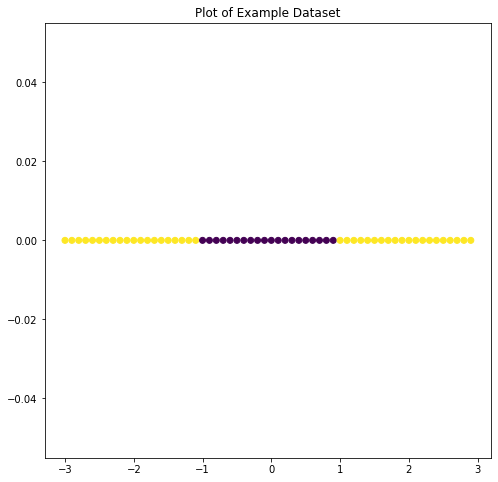

In [10]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,8))
plt.scatter(np.arange(-3,3,0.1).reshape(-1,1),np.zeros(len(example_data)), c=example_y)
plt.title('Plot of Example Dataset')
plt.show

Next, we'll now begin implementing the polynomial transformation. We begin by using scikit learn to carry polynomial transform on an example dataset. We'll also define the score variable $\hat{y_i}={\bf{\theta}}\cdot\phi(x)$ as:

$$
\begin{align}
\hat{y_i}={\bf{\theta}}\cdot\phi(x_i) &= \theta_{0} + \theta_{1} \phi_1(x_i)+\theta_{2} \phi_2(x_i)+...+\theta_{d} \phi_d(x_i) \\
&=\theta_{0} + \theta_{1} x_i+\theta_{2} x_i^2+...+\theta_{d} x_i^d
\end{align}
$$
where $i$ is the sample number $\phi_j(x)=x^j$, where $j$ is a power, and ${\bf{\theta}}$ is a weight vector that is the length of $d$ (more on ${\bf{\theta}}$ later). To tie it all back together, the $i^{th}$ sample will be labelled as 1 if $0 \leq \hat{y}_i$ and 0 if $0>\hat{y}_i$.


The first step will then be to compute the polynomial transform. Our data is in the form
$$X =
\begin{bmatrix}
    x_{1}\\
    x_{2}\\
    \vdots \\
    x_{n} 
\end{bmatrix}$$
Using second degree polynomials we transform it into:
$$X =\begin{bmatrix}
    1&x_{1} & x_{1}^2\\
    1&x_{2}& x_{2}^2\\
    \vdots & \vdots & \vdots \\
    1&x_{n}& x_{n}^2
\end{bmatrix}$$
More information here on scikit learn polynomial transformation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [11]:
from sklearn.preprocessing import PolynomialFeatures
# We will use a polynomial of 2nd degree for this example.
poly = PolynomialFeatures(2)

In [12]:
# Next we fit the polynomial transform
example_X = poly.fit_transform(example_data)

In [13]:
example_data

array([[-3.00000000e+00],
       [-2.90000000e+00],
       [-2.80000000e+00],
       [-2.70000000e+00],
       [-2.60000000e+00],
       [-2.50000000e+00],
       [-2.40000000e+00],
       [-2.30000000e+00],
       [-2.20000000e+00],
       [-2.10000000e+00],
       [-2.00000000e+00],
       [-1.90000000e+00],
       [-1.80000000e+00],
       [-1.70000000e+00],
       [-1.60000000e+00],
       [-1.50000000e+00],
       [-1.40000000e+00],
       [-1.30000000e+00],
       [-1.20000000e+00],
       [-1.10000000e+00],
       [-1.00000000e+00],
       [-9.00000000e-01],
       [-8.00000000e-01],
       [-7.00000000e-01],
       [-6.00000000e-01],
       [-5.00000000e-01],
       [-4.00000000e-01],
       [-3.00000000e-01],
       [-2.00000000e-01],
       [-1.00000000e-01],
       [ 2.66453526e-15],
       [ 1.00000000e-01],
       [ 2.00000000e-01],
       [ 3.00000000e-01],
       [ 4.00000000e-01],
       [ 5.00000000e-01],
       [ 6.00000000e-01],
       [ 7.00000000e-01],
       [ 8.0

In [14]:
example_X 

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.90000000e+00,  8.41000000e+00],
       [ 1.00000000e+00, -2.80000000e+00,  7.84000000e+00],
       [ 1.00000000e+00, -2.70000000e+00,  7.29000000e+00],
       [ 1.00000000e+00, -2.60000000e+00,  6.76000000e+00],
       [ 1.00000000e+00, -2.50000000e+00,  6.25000000e+00],
       [ 1.00000000e+00, -2.40000000e+00,  5.76000000e+00],
       [ 1.00000000e+00, -2.30000000e+00,  5.29000000e+00],
       [ 1.00000000e+00, -2.20000000e+00,  4.84000000e+00],
       [ 1.00000000e+00, -2.10000000e+00,  4.41000000e+00],
       [ 1.00000000e+00, -2.00000000e+00,  4.00000000e+00],
       [ 1.00000000e+00, -1.90000000e+00,  3.61000000e+00],
       [ 1.00000000e+00, -1.80000000e+00,  3.24000000e+00],
       [ 1.00000000e+00, -1.70000000e+00,  2.89000000e+00],
       [ 1.00000000e+00, -1.60000000e+00,  2.56000000e+00],
       [ 1.00000000e+00, -1.50000000e+00,  2.25000000e+00],
       [ 1.00000000e+00, -1.40000000e+00

Next, we compute the vector $\hat{y}=\phi(x) {\bf{\theta}}$ by multiplying the matrices $\phi(x)$ and ${\bf{\theta}}$. ${\bf{\theta}}$ is a weight vector that determines the value of the bias and the scale of the polynomial transformations. We will manually adjust these values to try to get a good fit using Binary Sign Classification model. The plus side of using ${\bf{\theta}}$ is that we can drop unwanted terms from prediction $h_i=sign(\hat{y}_i)$. For example we will implement computing the array of scores $\hat{y}$ as
$$
\begin{align}
\hat{y}=\phi(x) {\bf{\theta}}= \begin{bmatrix}
    1&x_{1} & x_{1}^2\\
    1&x_{2}& x_{2}^2\\
    \vdots & \vdots & \vdots \\
    1&x_{n}& x_{n}^2
\end{bmatrix}
\begin{bmatrix}
    0\\
    0\\
    1
\end{bmatrix}=\begin{bmatrix}
     x_{1}^2\\
     x_{2}^2\\
    \vdots\\
     x_{n}^2
\end{bmatrix}
\end{align}
$$

In [15]:
# We compute y_hat
theta = np.array([0,0,1])
y_hat = np.matmul(example_X,theta)

Now we'll plot our data 

<function matplotlib.pyplot.show>

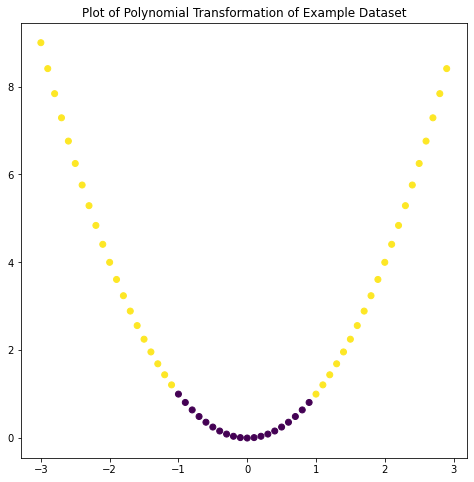

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(-3,3,0.1).reshape(-1,1) ,y_hat, c=example_y)
plt.title('Plot of Polynomial Transformation of Example Dataset')
plt.show

We can see that if we simply move this new curve down, we classify most of the examples correctly using the Binary Sign classifier. We'll do so by adjusting ${\bf{\theta}}$ so that the second degree polynomial term is moved down slightly by calculating:
$$
\begin{align}
\hat{y}=\phi(x) {\bf{\theta}}= \begin{bmatrix}
    1&x_{1} & x_{1}^2\\
    1&x_{2}& x_{2}^2\\
    \vdots & \vdots & \vdots \\
    1&x_{n}& x_{n}^2
\end{bmatrix}
\begin{bmatrix}
    -0.9\\
    0\\
    1
\end{bmatrix}=\begin{bmatrix}
     x_{1}^2-0.9\\
     x_{2}^2-0.9\\
    \vdots\\
     x_{n}^2
-0.9\end{bmatrix}
\end{align}
$$

<function matplotlib.pyplot.show>

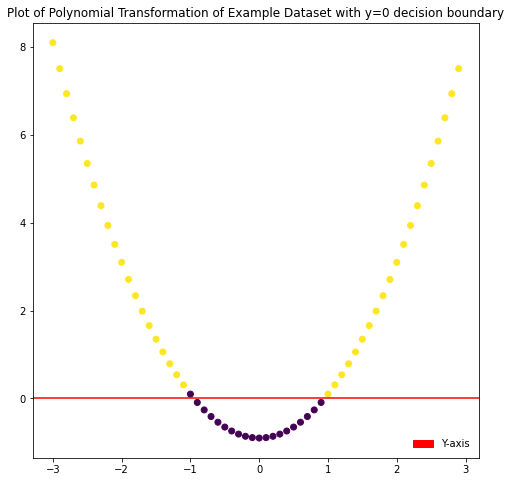

In [17]:
# Change the weight value
theta = np.array([-0.9,0,1])

# Compute y_hat
y_hat = np.matmul(example_X,theta)

# Plot
import matplotlib.patches as mpatches
plt.figure(figsize=(8,8))
arr1 = plt.scatter(np.arange(-3,3,0.1).reshape(-1,1) ,y_hat, c=example_y)
y_lim = plt.ylim()
x_lim = plt.xlim()
arr2 = plt.plot(x_lim, (0,0), 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.legend([arr1, arr2], ['u','v'])
red_patch = mpatches.Patch(color='red', label='Y-axis',linestyle ='-')
plt.legend(handles=[red_patch],loc='lower right', frameon=False)
plt.title('Plot of Polynomial Transformation of Example Dataset with y=0 decision boundary')
plt.show

We can now see that if we were to classify the datapoints by the sign of $y_i$ that most of the data points would be correctly classified as those below the y-axis would be classified as 0 while the rest would be classified as 1.

### Second transformation example:
In addition to implementing a polynomial transformation and moving it up or down, we can also move the transformation right or left using a simple yet tricky transformation. Recall that a function $f(x)$ can be moved right $q$ units by computing $f(x-q)$ or to the left by $q$ computing $f(x+q)$. We can also move the polynomial transform left or right in a similar fashion by letting $\phi_j(x)=(x-q)^j$. Now we want to implement a right transform by choosing $q = 2$, carrying out a polynomial transforms, and shifting polynomial transforms down by 0.9. So to begin, we first want to transform the example_dataset into:

$$X =\begin{bmatrix}
    1&(x_{1}-2) & (x_{1}-2)^2\\
    1&(x_{2}-2)& (x_{2}-2)^2\\
    \vdots & \vdots & \vdots \\
    1&(x_{n}-2)& (x_{n}-2)^2
\end{bmatrix}$$
This should move our transformed value over to the right 2 units.

<function matplotlib.pyplot.show>

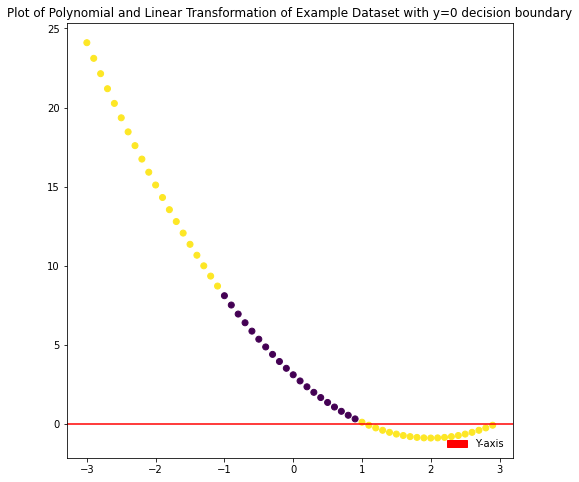

In [18]:
# First subtract 2 from each row in example_data
example_X = example_data-2

# Compute the 2nd degree polynomial transform
example_X = poly.fit_transform(example_X)

# Compute new y_hat with same theta as before
theta = np.array([-0.9,0,1])
y_hat = np.matmul(example_X,theta)

# Plot
import matplotlib.patches as mpatches
plt.figure(figsize=(8,8))
arr1 = plt.scatter(np.arange(-3,3,0.1).reshape(-1,1) ,y_hat, c=example_y)
y_lim = plt.ylim()
x_lim = plt.xlim()
arr2 = plt.plot(x_lim, (0,0), 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.legend([arr1, arr2], ['u','v'])
red_patch = mpatches.Patch(color='red', label='Y-axis',linestyle ='-')
plt.legend(handles=[red_patch],loc='lower right', frameon=False)
plt.title('Plot of Polynomial and Linear Transformation of Example Dataset with y=0 decision boundary')
plt.show

You can see that the parabola now begins at 2, rather than zero, and is shifted down.

## Binary Sign Classification on dataset from part (i)

### ii.a) How do you think a sign classification plus transformation model will perform on the Gaussian Quantile data?

By observation of the examples above, the practice of sign classfication + transformation modeling should net good (satisfying) results for our Guassian Quantile dataset. This is based on the idea that sign classifcation along with transformation will allow us to split our data more efficiently, and thus allowing a better implementation of a decision boundary; reflected by improved accuracy.

### ii.b) Implementation
Now, you will implement a Binary Sign Classification model to transform the linear data from part (i) as well as implement the helper functions to compute $\hat{y}$, the class prediction, and the model accuracy. Then you will use the methods outlined above to transform the data into a new form for classification. For this example, we will just run our model on all of the data x and y.

In [19]:
# Implement these helper functions
def generate_h(y):
    """
    Generates the class prediction h[i]=1 if y[i]>0 or h[i]=0 if y[i]<0
    args:
        y: a numpy array of y values
    return: a (500,1) array of 1 and 0s indicating class prediction
    """
    h = np.where(y >= 0, 1, 0)
    
    return h

def compute_accuracy(y, h): 
    """
    computes the accuracy of the model. (h-y)/len(y)
    args:
        y: true class label
        h: predicted labels
    return: the accuracy.
    """
    count = 0
    for i in range(y.size):
        if y[i] == h[i]:
            count += 1
    accuracy = count/len(y)
    return accuracy

In [20]:
# Impelement your data transformation using scikit learn polynomial
polynomial_degree = 2 # Choose a degree for polynomial transformation
q = 0 # Choose a value for horizontal shift
poly = PolynomialFeatures(polynomial_degree)
X_tf = X.reshape(-1,1) # Don't change
X_tf = poly.fit_transform(X_tf-q)

In [21]:
print(X_tf.shape)
print(X_tf)

print(np.min(X_tf[:,0]), np.mean(X_tf[:,0]), np.max(X_tf[:,0]))
print(np.min(X_tf[:,1]), np.mean(X_tf[:,1]), np.max(X_tf[:,1]))
print(np.min(X_tf[:,2]), np.mean(X_tf[:,2]), np.max(X_tf[:,2]))

(500, 3)
[[ 1.         -2.42338811  5.87280991]
 [ 1.          1.53512714  2.35661532]
 [ 1.         -2.97599422  8.85654158]
 ...
 [ 1.         -2.83125403  8.01599938]
 [ 1.         -2.30131441  5.29604801]
 [ 1.         -2.6615158   7.08366634]]
1.0 1.0 1.0
-8.971350997336645 -2.916311169994305 2.7675050028493797
2.6838860990190093e-05 12.589632637835237 80.48513871741321


In [22]:
# The length of w needs to be the same as the degree of polynomial+1,
# Either delete a poly-term or scale it, shift the transformed values up or down
theta = np.array([0,4.2,1])

# Compute y_hat
y_hat = np.matmul(X_tf,theta)

# Run sign model
h = generate_h(y_hat)
accuracy = compute_accuracy(y,h)
print(f"accuracy= {accuracy * 100}%")

accuracy= 75.2%


### Plotting data against y=0
The plotting function below may be helpful for visualizing the data against the decision boundary.

<function matplotlib.pyplot.show>

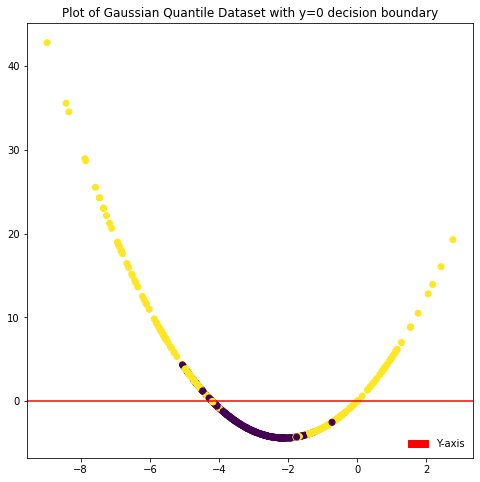

In [23]:
# Plot
import matplotlib.patches as mpatches
plt.figure(figsize=(8,8))
arr1 = plt.scatter(X ,y_hat, c=y)
y_lim = plt.ylim()
x_lim = plt.xlim()
arr2 = plt.plot(x_lim, (0,0), 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
red_patch = mpatches.Patch(color='red', label='Y-axis',linestyle ='-')
plt.legend(handles=[red_patch],loc='lower right', frameon=False)
plt.title('Plot of Gaussian Quantile Dataset with y=0 decision boundary')
plt.show

### ii.c) How did we do?

Please comment on the performance of the model you created on classifying the dataset. What transformation parameters did you use? What was your ${\bf{\theta}}$?


In complete honesty, I'm not satisfied with the performance of my model, ~75%. Although this may stem from reading of other's results on Piazza netting 85+% accuracy. Sticking with a polynomial degree of 2, I spent up to 6+ hours exploring many values for q (horizontal shift), and theta values for all three indices. My best result was netted by somewhat emulating the first example; q=0(no horizontal shift). My theta values are \[0, 4.2, 1\]. Note: It did occur to me to create a function that would call generate_h() and compute_accuracy(), while testing values for theta indices; bounding such values and indices by good estimates discovered from experimentation, and return the resulting data for accuracy above 85%, however, I ran into a time crunch, and thus didn't get this implemented, also I am a python noob (but that didn't stop me from taking this course :P ).

##iii) Artificial Neural Network
Next, we will use tensorflow to create an artificial neural network to classify the Gaussian Quantile dataset.

### iii.a) Build a Neural Network to feed in the Gaussian Quantile data

Below, define a neural network with the following layers:
<ul>
<li>Input Layer</li>
<li>Dense Layer with 15 neurons, choose whatever activation you think is suitable</li>
<li>Dense Layer with 5 neurons, choose whatever activation you think is suitable</li>
<li>Dense Layer with 1 neuron, choose whatever activation you think is suitable</li>
<li> Dense layer with 1 neuron for classification (what activation do we need to use?)</li>
</ul>

Then, run model.summary(), compile, then fit the model

In [24]:
from tensorflow.keras.layers import Input, Dense # Only use these layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * 

# Building network here
input_layer = Input(shape=(1))
x = Dense(15, activation='tanh')(input_layer)
x = Dense(5, activation='tanh')(x)
x = Dense(1, activation='tanh')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_layer, x)

In [25]:
# Show a summary of your model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 15)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile your model with the chosen optimizer, binary cross entropy for the loss, and accuracy as the metric
optimizer = Adam()
model.compile(optimizer=optimizer,loss='bce',metrics=['accuracy'])

In [27]:
# Call fit on your model passing in the X, y data above, train for 100 epochs
hist = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 0s 16ms/step - loss: 0.7013 - accuracy: 0.5850 - val_loss: 0.7166 - val_accuracy: 0.5700
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.6225 - val_loss: 0.7039 - val_accuracy: 0.6100
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.6625 - val_loss: 0.6945 - val_accuracy: 0.6300
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6755 - accuracy: 0.6750 - val_loss: 0.6852 - val_accuracy: 0.6800
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.6800 - val_loss: 0.6786 - val_accuracy: 0.6700
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6618 - accuracy: 0.6850 - val_loss: 0.6710 - val_accuracy: 0.6800
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.6975 - val_loss: 0.6629 - val_accuracy: 0.6900
Epoch 8/100


In [28]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

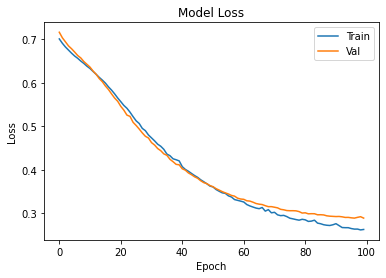

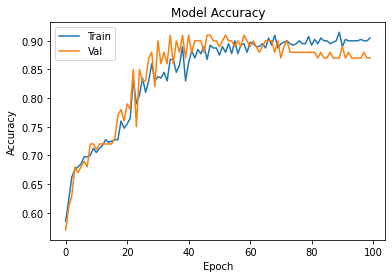

In [29]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

###iii.a) How did the model perform.
How did your neural network preform? What hyperparameters and optimizer did you choose? Was the model able to outperform Logistic Regression? Outperform Binary Sign Classification? If it did, why do you think your neural network beat these other models? 

My neural network performed well, giving the final resulting line: \
Epoch 100/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2871 - accuracy: 0.9000 - val_loss: 0.3122 - val_accuracy: 0.8600 \
For hyperparameters, I chose activations: 'tanh', 'tanh', 'tanh', and 'sigmoid' in that order. \
Given that the NN class exercise, used activation='tanh', for layers preceding the classfication, this influenced my decision to implement something similar. \
For classification, I chose activation='sigmoid', given this was a topic heavily emphasized in class, as the sigmoid function can classify in binary, allowing an efficient distribution of results. \
For optimizer I left the default Adam(), which according to documentation 'is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments'. \
My model did outperform both Logistic Regression and Binary Sign Classification scores. \
One reason for this lies, in that the NN involves multiple layers, so its implementation is more efficient to seperate the dataset prior to binary classfication(sigmoid function). \
We saw how Logistic Regression struggled to linearly seperate the dataset; we can consider this an inefficient one-layer NN. \
For performing better than Binary Sign Classifcation, this may be specific to my bad experiment/implementation of that given method above. 

#2) Neural Network Classification
Next, we move on to using an artificial Neural Network for a task that is a bit harder. We will see if we can train our model to determine if patients with suffering from heart disease died during follow up treatment. The dataset has 299 samples with 12 features each and a target class:
<ul>
<li>age: age of the patient (years)</li>
<li>anaemia: decrease of red blood cells or hemoglobin (boolean)</li>
<li>high blood pressure: if the patient has hypertension (boolean)</li>
<li>creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)</li>
<li> diabetes: if the patient has diabetes (boolean)</li>
<li> ejection fraction: percentage of blood leaving the heart at each contraction (percentage)</li>
<li> platelets: platelets in the blood (kiloplatelets/mL)</li>
<li> sex: woman or man (binary)</li>
<li> serum creatinine: level of serum creatinine in the blood (mg/dL)</li>
<li> serum sodium: level of serum sodium in the blood (mEq/L)</li>
<li> smoking: if the patient smokes or not (boolean)</li>
<li> time: follow-up period (days)</li>
<li> [target] death event: if the patient deceased during the follow-up period (boolean)</li>
</ul>

In [30]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv

--2020-07-13 05:48:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12239 (12K) [application/x-httpd-php]
Saving to: ‘heart_failure_clinical_records_dataset.csv.2’

heart_failure_clini 100%[===================>]  11.95K  --.-KB/s    in 0s      

2020-07-13 05:48:29 (93.4 MB/s) - ‘heart_failure_clinical_records_dataset.csv.2’ saved [12239/12239]



## Data Loading and Preprocessing


In [31]:
# Read in the data
nn_dataframe = pd.read_csv('heart_failure_clinical_records_dataset.csv',sep=',')
nn_dataframe.dropna(inplace=True)

In [32]:
# Check data
nn_dataframe.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Split Data into X and y. Then scale the X data for model training

In [33]:
X = nn_dataframe.iloc[:, 0:12]
y = nn_dataframe.iloc[:,12]

In [34]:
# Check X data
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


###2.a) Use MinMaxScaler() to preprocess the dataset.
This is similar to standardization but will transform all the feature values to between 0 and 1.
\
**Hint: read information on MinMaxScaler (and other preprocessing transforms here):https://scikit-learn.org/stable/modules/preprocessing.html#normalization

In [35]:
from sklearn import preprocessing

X = X.values # Returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler() # Define the MinMaxScaler object
X = min_max_scaler.fit_transform(X) # Fit the MinMaxScaler

# Create numpy array of labels
y = y.values

In [36]:
print(X.shape)
print(y.shape)

(299, 12)
(299,)


###2.b) Implement an Artificial Neural network
Make a neural network to your liking. Define the input layer. Add Layers, specify the number of neurons in each layer, and the activation. and define the out layer.

In [37]:
from tensorflow.keras.models import Sequential

# Building network here
model = Sequential()
model.add(Dense(units = 8, input_dim=12, activation='tanh'))
model.add(Dense(units = 6, activation='tanh'))
model.add(Dense(units = 6, activation='tanh'))
model.add(Dense(units = 1, activation='tanh'))
model.add(Dense(units = 1, activation='sigmoid'))

In [38]:
# Show a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile your model with the chosen optimizer, binary cross entropy for the loss, and accuracy as the metric
optimizer = Adam()
model.compile(optimizer=optimizer,loss='bce',metrics=['accuracy'])

In [40]:
# Call fit on your model passing in the X, y data above, train for 100 epochs
hist = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 19ms/step - loss: 0.6756 - accuracy: 0.6067 - val_loss: 0.6040 - val_accuracy: 0.9500
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6694 - accuracy: 0.6360 - val_loss: 0.5815 - val_accuracy: 0.9500
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6654 - accuracy: 0.6318 - val_loss: 0.5652 - val_accuracy: 0.9500
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6630 - accuracy: 0.6318 - val_loss: 0.5533 - val_accuracy: 0.9500
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6610 - accuracy: 0.6276 - val_loss: 0.5468 - val_accuracy: 0.9500
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.6276 - val_loss: 0.5414 - val_accuracy: 0.9500
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6578 - accuracy: 0.6318 - val_loss: 0.5353 - val_accuracy: 0.9500
Epoch 8/100
8/8 [=========

###2.c) How did the model perform.
How did your neural network preform? What hyperparameters and optimizer did you choose? What activation did you use?

The neural network performed well with a final result of: \
Epoch 100/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4128 - accuracy: 0.8536 - val_loss: 0.2319 - val_accuracy: 0.9500 \
My model contains 1 input layer, 1 output layer, and 3 hidden layers. \
The input layer contains 8 neurons, and the input dimension of 12, to reflect the number of feautures involved in our dataset. \
The following 2 hidden layers, contain 6 neurons; I explored using 7, but that nettted me a worst accuracy, and I decided on 6 since I wanted to scale down the number of neurons from the input layer. \
The last hidden layer, with 1 neuron, was added as a boost of accuracy; previously I was netting ~83%, so I noticed the boost in accuracy by adding this layer, which was also inspired by the previous exercise. \
My output layer also consists on 1 neuron, and this too was inspired by all NN exercises prior to this segment, as well the needed implementation for binary classifcation. \
For the optimizer I left it at default, Adam(), all I know for certain is that this algorithm works well across a wide range of DL architectures. \
For all activation functions preceding the output layer, I chose 'tanh', given that it is as useful as the sigmoid function activation, however the only difference being its range -1 to 1. \
For the last layer, the output layer, I chose sigmoid function activation, given what we've discussed in lectures and through this exercise, the output of 0 or 1, is extremely useful for the classifcation of the dataset.
